In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv('./Tweets1.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,target,Tweets
0,0,"Work is so slow, I'm seriously considering qui..."
1,0,@davidvancamp That's awful. I wish mine would...
2,0,"Well, i guess i need to start a new chapter in..."
3,0,"@SandraBernhard Miss Lady, since you brought u..."
4,0,@CarterTwinsZach Im sorry I hope u feel better...


In [5]:
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub(r'#', '', text) # Removing '#' hash tag
 text = re.sub(r'RT[\s]+', '', text) # Removing RT
 text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlink
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df


,target,Tweets
0,0,"Work is so slow, I'm seriously considering qui..."
1,0,That's awful. I wish mine would stop making ...
2,0,"Well, i guess i need to start a new chapter in..."
3,0,"Miss Lady, since you brought up your web stor..."
4,0,Im sorry I hope u feel better cuz I love u an...
...,...,...
3995,4,Five? Seems a little bit too late in the morn...
3996,4,ryanodonnell: Thanks for putting on such a gr...
3997,4,Carli's my friend
3998,4,I feel so great for starting twitter at suzann...


In [6]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,target,Tweets,Subjectivity,Polarity
0,0,"Work is so slow, I'm seriously considering qui...",0.533333,-0.316667
1,0,That's awful. I wish mine would stop making ...,1.000000,-1.000000
2,0,"Well, i guess i need to start a new chapter in...",0.277273,0.118182
3,0,"Miss Lady, since you brought up your web stor...",0.000000,0.000000
4,0,Im sorry I hope u feel better cuz I love u an...,0.851020,-0.334184
...,...,...,...,...
3995,4,Five? Seems a little bit too late in the morn...,0.550000,-0.281250
3996,4,ryanodonnell: Thanks for putting on such a gr...,0.612500,0.250000
3997,4,Carli's my friend,0.000000,0.000000
3998,4,I feel so great for starting twitter at suzann...,0.463889,0.169444


In [7]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else :
    return "Positive"
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,target,Tweets,Subjectivity,Polarity,Analysis
0,0,"Work is so slow, I'm seriously considering qui...",0.533333,-0.316667,Negative
1,0,That's awful. I wish mine would stop making ...,1.000000,-1.000000,Negative
2,0,"Well, i guess i need to start a new chapter in...",0.277273,0.118182,Positive
3,0,"Miss Lady, since you brought up your web stor...",0.000000,0.000000,Neutral
4,0,Im sorry I hope u feel better cuz I love u an...,0.851020,-0.334184,Negative
...,...,...,...,...,...
3995,4,Five? Seems a little bit too late in the morn...,0.550000,-0.281250,Negative
3996,4,ryanodonnell: Thanks for putting on such a gr...,0.612500,0.250000,Positive
3997,4,Carli's my friend,0.000000,0.000000,Neutral
3998,4,I feel so great for starting twitter at suzann...,0.463889,0.169444,Positive


In [8]:
# Printing the positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Well, i guess i need to start a new chapter in professional my life 

2)  Yeah, I know--pigs for sure...which is a great visual on my end among all the akimbo-ness. 

3) ouh _Franzi was hast du hun'? hoffentlich nichts schlimmes. yes, i miss you rlly much, mary too. 

4)  I can't remember the last movie I saw in a theatre!  Hope you guys have fun! What are you going to see?

5) I've really lost my glasses now  WHERE ARE THEY. I can't sleep with my contacts in. I miss yoouuu, glasses, you make me ME.

6) Shopping for shirts in shorts is apparently not the best of ideas in London. Get paid little to no attention, till the wallet appears 

7) No well  :O xx

8) hoping my grandma starts improving soon. she had back surgery and is in the hospital and not looking good.... 

9)  Not a bad price for the Kannagi figure actually. 1/10 makes me cry though. Not enough Itsuki to luuuuuuuuuuuuuv. 

10) It's only been an hour, but it feels like forever and a day.  I gues

In [9]:
# Printing the negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Work is so slow, I'm seriously considering quitting my job this week 

2)  That's awful.  I wish mine would stop making fat jokes.

3)  Im sorry I hope u feel better cuz I love u and it makes feel horrible when ur sick or sad or mad or hurt 

4) Woke up with the worst headache 

5) Damn, time for another pedicure, just chipped my toenail on an open cabinet  Shit happens!

6)  takboleh. i am so in loveeeeeeeeeeee  life sucks. FMMFL

7)  yikes.. no good.  i hate hayfever myself... and meds don't help much for me either.  

8) my brain is officially broken.  

9) being bored like always well at least for now all my friends are gone on vacation! 

10) time to get back to work   man it's gonna be a LONG day!

11) Robert Reisinger just in...very late 

12)  Wow, that really sucks   So sad to see when that happens, when it's believed to be the only way out. 

13) just had the worst philly steak sandwich in my life   with liquid cheese... phew

14) Is exhausted...

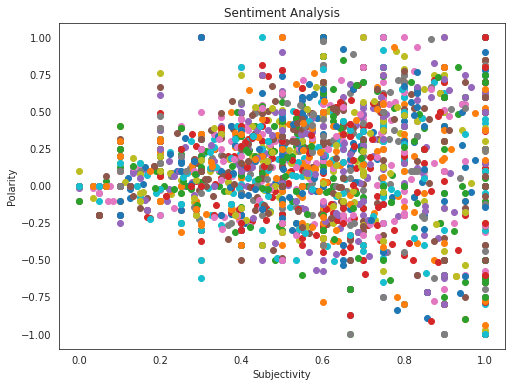

In [10]:
# Plotting the graph
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Subjectivity"][i],df["Polarity"][i]) 
# plt.scatter(x,y,color)
plt.title('Sentiment Analysis') 
plt.ylabel('Polarity') 
plt.xlabel('Subjectivity') 
plt.show()

In [11]:
# Printing the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

42.4

In [12]:
# Printing the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

22.4

In [13]:
# Printing the percentage of neutral tweets
ptweets = df[df.Analysis == 'Neutral']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

35.1

In [14]:
# displayingthe value counts
df['Analysis'].value_counts()

Positive    1697
Neutral     1406
Negative     897
Name: Analysis, dtype: int64

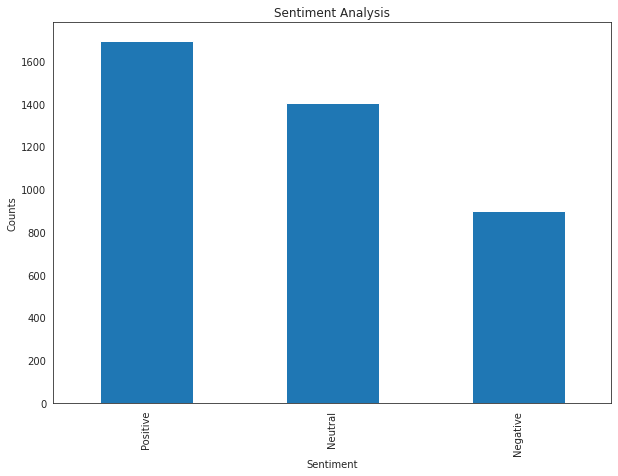

In [15]:
# Plotting and visualizing the counts
plt.figure(figsize=(10,7))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()